In [ ]:
# Common imports
import numpy as np
import pandas as pd
import zipfile as zp
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
# From Spacy Tutorial Notebook
#To wrap long text lines
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

#For fancy table Display
%load_ext google.colab.data_table

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# folder_path= ('/content/drive/Othercomputers/Asus Zenbook 14/Degree/Y3 S2/ML Applications/Project')
folder_path = "/content/drive/My Drive/MLA Project"
os.chdir(folder_path)

Mounted at /content/drive


In [ ]:
# LEMMATIZATION WITH SPACY
# Download medium model
!python -m spacy download en_core_web_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 29.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load('en_core_web_md')

In [ ]:
# Upload text
# reviews_df = pd.read_csv('allrecipes_reviews_9.csv')
reviews_df = pd.read_csv('recipes/recipes_reviews.csv')
print(len(reviews_df))
reviews_df.head()

260


,recipe_id,recipe,user,rating,date,review
0,1,Poulet Roti a l'Algerienne (Algerian Roast Chi...,Rick Sowa,5,06/07/2020,Excellent blend of flavors. Since I like spic...
1,1,Poulet Roti a l'Algerienne (Algerian Roast Chi...,BOOKMARKER,3,04/17/2020,5.14.20 ... https://www.allrecipes.com/recipe/...
2,1,Poulet Roti a l'Algerienne (Algerian Roast Chi...,France C,4,09/07/2017,A nice change of pace for chicken! Next time I...
3,2,Restaurant-Style Chicken Scampi,Erica Chetwood,5,12/05/2019,Everyone loved it! It was a hit!
4,2,Restaurant-Style Chicken Scampi,Christine W,4,03/26/2019,Just a little bland despite all the garlic. I ...


In [ ]:
!python -m spacy download xx_sent_ud_sm
!pip install --upgrade spacy_langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 41.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('xx_sent_ud_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Register and add the component, can only be ran once
# from spacy_langdetect import LanguageDetector
# from spacy.language import Language

# Function to add the language detector
"""def get_lang_detector(nlp, name):
    return LanguageDetector()"""
# Language.factory("language_detector", func=get_lang_detector)


In [ ]:
mult_nlp = spacy.load('xx_sent_ud_sm')
mult_nlp.add_pipe('language_detector', last=True)
"""if 'sentencizer' not in mult_nlp.pipe_names:
    sentencizer = Sentencizer()  # Create the sentencizer component
    mult_nlp.add_pipe('sentencizer', last=True) """

nlp.disable_pipe('parser')


In [ ]:
from spacy.pipeline import Sentencizer
stopwords = set(nlp.Defaults.stop_words)

def text_preprocessing(rawtext):
    if not isinstance(rawtext, str):
        return None

    # Sentence tokenization & language filtering
    doc_mult = mult_nlp(rawtext)
    english_sentences = [sent.text for sent in doc_mult.sents if sent._.language['language'] == 'en']

    lemmatized_tokens = []

    for sentence in english_sentences:
        doc = nlp(sentence)

        for token in doc:
            if token.is_stop:
                continue
            # Alphanumeric filter
            if not token.is_alpha and not token.is_digit:
                continue
            # Stopword filtering
            lower=token.lemma_.lower()
            if lower in stopwords:
                continue
            # Append lemmatized token
            lemmatized_tokens.append(lower)

    return lemmatized_tokens

In [ ]:
reviews=reviews_df['review'].values.tolist()

In [ ]:
# Check several reviews
print('============= Review =============')
print(reviews[0], '\n')
print('============= Review =============')
print(reviews[1], '\n')
print('============= Review =============')
print(reviews[2])

============= Review =============
Excellent blend of flavors.  Since I like spicy, I added a diced fresh jalepeño and marinated it overnight. 

============= Review =============
5.14.20 ... https://www.allrecipes.com/recipe/258886/poulet-roti-a-lalgerienne-algerian-roast-chicken/ ... I dunno. Nearly every whole chicken recipe I try is good. This one is good, too. 'Just didn't see it as special. Directions don't mention marinating, but description does. Truth, if I thought marinating was required, I would've passed - because I'm too last-minute for that. 

============= Review =============
A nice change of pace for chicken! Next time I will marinate the chicken ahead of time as suggested for extra flavor.   There is quite a bit of cayenne, and while this doesn't make the actual meat spicy, if you'd like to use the drippings, be aware that it will be spicy.  Also, my chicken was 4lbs and it was done at 1h 15, so for a 2lb chicken as stated in the recipe, you'll want to check well befo

In [ ]:
# Check function results over one review
text= reviews[1]
print('============= Original text =============')
print(text)
print('\n============= Lemmatized text =============')
print(text_preprocessing(text))

============= Original text =============
5.14.20 ... https://www.allrecipes.com/recipe/258886/poulet-roti-a-lalgerienne-algerian-roast-chicken/ ... I dunno. Nearly every whole chicken recipe I try is good. This one is good, too. 'Just didn't see it as special. Directions don't mention marinating, but description does. Truth, if I thought marinating was required, I would've passed - because I'm too last-minute for that.

============= Lemmatized text =============
['nearly', 'chicken', 'recipe', 'try', 'good', 'good', 'special', 'truth', 'think', 'marinating', 'require', 'pass', 'minute']


In [ ]:
# Check results over one review
doc = nlp(text)
unique_lexemes = {nlp.vocab[str(token)] for token in doc}
for lexeme in unique_lexemes:
    print(lexeme.text)


because
if
n't
does
minute
.
do
it
for
https://www.allrecipes.com/recipe/258886/poulet-roti-a-lalgerienne-algerian-roast-chicken/
whole
try
...
've
Nearly
too
did
-
,
recipe
I
chicken
see
is
This
required
thought
mention
'm
5.14.20
one
Directions
good
last
'
would
that
was
special
as
every
dunno
passed
Just
Truth
but
description
marinating


In [ ]:
stopwords = [token.text for token in doc if token.is_stop]
print("Stopwords in document:", stopwords)

Stopwords in document: ['I', 'every', 'whole', 'I', 'is', 'This', 'one', 'is', 'too', 'Just', 'did', "n't", 'see', 'it', 'as', 'do', "n't", 'but', 'does', 'if', 'I', 'was', 'I', 'would', "'ve", 'because', 'I', "'m", 'too', 'last', 'for', 'that']


In [ ]:
# Lemmatize all reviews in df, store in a new column
reviews_df['lemmas'] = reviews_df['review'].apply(text_preprocessing)

In [ ]:
reviews_df.head(5)

,recipe_id,recipe,user,rating,date,review,lemmas
0,1,Poulet Roti a l'Algerienne (Algerian Roast Chi...,Rick Sowa,5,06/07/2020,Excellent blend of flavors. Since I like spic...,"[like, spicy, add, diced, fresh, jalepeño, mar..."
1,1,Poulet Roti a l'Algerienne (Algerian Roast Chi...,BOOKMARKER,3,04/17/2020,5.14.20 ... https://www.allrecipes.com/recipe/...,"[nearly, chicken, recipe, try, good, good, spe..."
2,1,Poulet Roti a l'Algerienne (Algerian Roast Chi...,France C,4,09/07/2017,A nice change of pace for chicken! Next time I...,"[nice, change, pace, chicken, time, marinate, ..."
3,2,Restaurant-Style Chicken Scampi,Erica Chetwood,5,12/05/2019,Everyone loved it! It was a hit!,"[love, hit]"
4,2,Restaurant-Style Chicken Scampi,Christine W,4,03/26/2019,Just a little bland despite all the garlic. I ...,"[little, bland, despite, garlic, notice, recip..."


In [ ]:
# Check if the function created 'lemmas'=None
print(len(reviews_df[reviews_df['lemmas'].isnull()]['review']))

11


In [ ]:
# Eliminate reviews that do not have text, only stars.
reviews_df = reviews_df[reviews_df['lemmas'].notna()]

In [ ]:
print(len(reviews_df[reviews_df['lemmas'].isnull()]['review']))

0


In [ ]:
# LEMMATIZATION WITH NLTK
import nltk
import re
# Function from Vectorization I (Jerónimo Arenas-García, Lorena Calvo-Bartolomé, Jesús Cid-Suero)
def check_nltk_packages():
  packages = ['punkt','stopwords','omw-1.4','wordnet']

  for package in packages:
    try:
      nltk.data.find('tokenizers/' + package)
    except LookupError:
      nltk.download(package)
check_nltk_packages()

try:
  import lxml
except ModuleNotFoundError:
  %pip install lxml

try:
  import contractions
except ModuleNotFoundError:
  %pip install contractions
  import contractions

from bs4 import BeautifulSoup
import re


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
%pip install langid

In [ ]:
# Download
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import langid


# Incorporate detection of english language as in Spacy.
def is_english(text):
    # Detect the language of the text
    lang, _ = langid.classify(text)
    return lang == 'en'

def prepare_data(text, wnl, stopwords_list):
    if not is_english(text):
      return None
    else:
        # Remove HTML tags
        soup = BeautifulSoup(text, "lxml")
        text = soup.get_text()
        # Remove URLs
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        # Expand contractions
        wrangled_text = contractions.fix(text)
        # Tokenization
        review_tokens = word_tokenize(wrangled_text)
        # Lowercasing and filtering non-alphanumeric tokens
        review_tokens_filtered = [token.lower() for token in review_tokens if token.isalnum()]
        # Lemmatization
        lemmatized_review = [wnl.lemmatize(token) for token in review_tokens_filtered]
        # Remove stopwords
        exclude_lemmas = ['doe', 'wa']
        clean_review = [token for token in lemmatized_review if token not in stopwords_list and token not in exclude_lemmas]
        # Return the cleaned list of tokens
        return clean_review

# Apply the function to all reviews in corpus_df and store in 'nltk_lemmas'
wnl = WordNetLemmatizer()
stopwords_en = set(stopwords.words('english'))
reviews_df["nltk_lemmas"] = reviews_df["review"].apply(prepare_data, args=(wnl, stopwords_en))


In [ ]:
reviews_df.head(5)

,recipe_id,recipe,user,rating,date,review,lemmas,nltk_lemmas
0,1,Poulet Roti a l'Algerienne (Algerian Roast Chi...,Rick Sowa,5,06/07/2020,Excellent blend of flavors. Since I like spic...,"[like, spicy, add, diced, fresh, jalepeño, mar...","[excellent, blend, flavor, since, like, spicy,..."
1,1,Poulet Roti a l'Algerienne (Algerian Roast Chi...,BOOKMARKER,3,04/17/2020,5.14.20 ... https://www.allrecipes.com/recipe/...,"[nearly, chicken, recipe, try, good, good, spe...","[know, nearly, every, whole, chicken, recipe, ..."
2,1,Poulet Roti a l'Algerienne (Algerian Roast Chi...,France C,4,09/07/2017,A nice change of pace for chicken! Next time I...,"[nice, change, pace, chicken, time, marinate, ...","[nice, change, pace, chicken, next, time, mari..."
3,2,Restaurant-Style Chicken Scampi,Erica Chetwood,5,12/05/2019,Everyone loved it! It was a hit!,"[love, hit]","[everyone, loved, hit]"
4,2,Restaurant-Style Chicken Scampi,Christine W,4,03/26/2019,Just a little bland despite all the garlic. I ...,"[little, bland, despite, garlic, notice, recip...","[little, bland, despite, garlic, noticed, reci..."


In [ ]:
review_idx=1
print('============= Review =============')
print(reviews_df.loc[review_idx, 'review'], '\n')
print('============= Lemmas Spacy =============')
print(reviews_df.loc[review_idx, 'lemmas'], '\n')
print('============= Lemmas Nltk =============')
print(reviews_df.loc[review_idx, 'nltk_lemmas']
)

============= Review =============
5.14.20 ... https://www.allrecipes.com/recipe/258886/poulet-roti-a-lalgerienne-algerian-roast-chicken/ ... I dunno. Nearly every whole chicken recipe I try is good. This one is good, too. 'Just didn't see it as special. Directions don't mention marinating, but description does. Truth, if I thought marinating was required, I would've passed - because I'm too last-minute for that. 

============= Lemmas Spacy =============
['nearly', 'chicken', 'recipe', 'try', 'good', 'good', 'special', 'truth', 'think', 'marinating', 'require', 'pass', 'minute'] 

============= Lemmas Nltk =============
['know', 'nearly', 'every', 'whole', 'chicken', 'recipe', 'try', 'good', 'one', 'good', 'see', 'special', 'direction', 'mention', 'marinating', 'description', 'truth', 'thought', 'marinating', 'required', 'would', 'passed']


In [ ]:
# Preferred result: Nltk lemmatization/cleaning, as it eliminates less lemmas, more informative

In [ ]:
# Download the Averaged Perceptron Tagger model for part-of-speech (POS) tagging in English, used to assign POS tags to words in a sentence.
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
# Refine Nltk function to detect relevant POS
from nltk.tag import pos_tag
# Incorporate detection of english language as in Spacy.
def is_english(text):
    # Detect the language of the text
    lang, _ = langid.classify(text)
    return lang == 'en'

def prepare_data(text, wnl, stopwords_list):
    # Ensure we are dealing with strings and that text is in English
    if not isinstance(text, str) or not is_english(text):
        return None
    else:
        # Remove HTML tags
        soup = BeautifulSoup(text, "lxml")
        text = soup.get_text()

        # Remove URLs
        text = re.sub(r'https?://\S+|www\.\S+', '', text)

        # Expand contractions
        wrangled_text = contractions.fix(text)

        # Tokenization
        review_tokens = word_tokenize(wrangled_text)

        # POS tagging
        pos_tags = pos_tag(review_tokens)

        # Initialize the lemmatizer
        lemmatizer = wnl

        lemmatized_tokens = []

        for word, pos in pos_tags:
            # Convert POS tag to WordNet's format
            if pos.startswith('NN'):
                pos = 'n'  # Noun
            elif pos.startswith('VB'):
                pos = 'v'  # Verb
            elif pos.startswith('JJ'):
                pos = 'a'  # Adjective
            elif pos.startswith('RB'):
                pos = 'r'  # Adverb
            else:
                pos = 'n'  # Default to noun if no other match

            # Lemmatize the word using the appropriate POS tag
            lemmatized_token = lemmatizer.lemmatize(word, pos)
            lemmatized_tokens.append(lemmatized_token)

        # Lowercasing and filtering non-alphanumeric tokens
        review_tokens_filtered = [token.lower() for token in lemmatized_tokens if token.isalnum()]

        # Remove stopwords
        exclude_lemmas = ['doe', 'wa']
        clean_review = [token for token in review_tokens_filtered if token not in stopwords_list and token not in exclude_lemmas]

        # Return the cleaned list of tokens
        return clean_review

# Apply the function to all reviews in corpus_df and store in 'nltk_lemmas'
wnl = WordNetLemmatizer()
stopwords_en = set(stopwords.words('english'))
reviews_df["nltk_lemmas"] = reviews_df["review"].apply(prepare_data, args=(wnl, stopwords_en))



In [ ]:
review_idx=4
print('============= Review =============')
print(reviews_df.loc[review_idx, 'review'], '\n')
print('============= Lemmas Spacy =============')
print(reviews_df.loc[review_idx, 'lemmas'], '\n')
print('============= Lemmas Nltk =============')
print(reviews_df.loc[review_idx, 'nltk_lemmas']
)

============= Review =============
Just a little bland despite all the garlic. I noticed the recipe doesn’t call for any salt or pepper. I would recommend seasoning the chicken before cooking it.  Also, half a pound of pasta is plenty.  A pound seems like it would be overwhelming! 

============= Lemmas Spacy =============
['little', 'bland', 'despite', 'garlic', 'notice', 'recipe', 'salt', 'pepper', 'recommend', 'season', 'chicken', 'cook', 'half', 'pound', 'pasta', 'plenty'] 

============= Lemmas Nltk =============
['little', 'bland', 'despite', 'garlic', 'notice', 'recipe', 'call', 'salt', 'pepper', 'would', 'recommend', 'season', 'chicken', 'cook', 'also', 'half', 'pound', 'pasta', 'plenty', 'pound', 'seem', 'like', 'would', 'overwhelming']


In [ ]:
# This way it detects better the derivations of verbs and takes them to infinitive form.

In [ ]:
# GENSIM
# INSTRUCTIONS: run this code, stop the runtime, then skip this cell and run the
# second cell.
!pip install --no-cache-dir --upgrade numpy scipy gensim
!pip install --no-cache-dir pandas==2.2.2  # Reinstall the required pandas version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 203.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 208.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 241.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 227.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 232.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source o

In [ ]:
# All code needed to start from this point
import nltk
import re

# Function from Vectorization I (Jerónimo Arenas-García, Lorena Calvo-Bartolomé, Jesús Cid-Suero)
def check_nltk_packages():
  packages = ['punkt','stopwords','omw-1.4','wordnet']

  for package in packages:
    try:
      nltk.data.find('tokenizers/' + package)
    except LookupError:
      nltk.download(package)
check_nltk_packages()

try:
  import lxml
except ModuleNotFoundError:
  %pip install lxml

try:
  import contractions
except ModuleNotFoundError:
  %pip install contractions
  import contractions

from bs4 import BeautifulSoup
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
%pip install langid

In [ ]:
# from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import langid

In [ ]:
# Refine Nltk function to detect relevant POS
# Incorporate detection of english language as in Spacy.
def is_english(text):
    # Detect the language of the text
    lang, _ = langid.classify(text)
    return lang == 'en'

def prepare_data(text, wnl, stopwords_list):
    # Ensure we are dealing with strings and that text is in English
    if not isinstance(text, str) or not is_english(text):
        return None
    else:
        # Remove HTML tags
        soup = BeautifulSoup(text, "lxml")
        text = soup.get_text()

        # Remove URLs
        text = re.sub(r'https?://\S+|www\.\S+', '', text)

        # Expand contractions
        wrangled_text = contractions.fix(text)

        # Tokenization
        review_tokens = word_tokenize(wrangled_text)

        # POS tagging
        pos_tags = pos_tag(review_tokens)

        # Initialize the lemmatizer
        lemmatizer = wnl

        lemmatized_tokens = []

        for word, pos in pos_tags:
            # Convert POS tag to WordNet's format
            if pos.startswith('NN'):
                pos = 'n'  # Noun
            elif pos.startswith('VB'):
                pos = 'v'  # Verb
            elif pos.startswith('JJ'):
                pos = 'a'  # Adjective
            elif pos.startswith('RB'):
                pos = 'r'  # Adverb
            else:
                pos = 'n'  # Default to noun if no other match

            # Lemmatize the word using the appropriate POS tag
            lemmatized_token = lemmatizer.lemmatize(word, pos)
            lemmatized_tokens.append(lemmatized_token)

        # Lowercasing and filtering non-alphanumeric tokens. Ultimately, take out digits as not useful in our Gensim dictionary.
        review_tokens_filtered = [token.lower() for token in lemmatized_tokens if token.isalnum() and not token.isdigit()]

        # Remove stopwords
        exclude_lemmas = ['doe', 'wa']  # You can extend this list based on needs
        clean_review = [token for token in review_tokens_filtered if token not in stopwords_list and token not in exclude_lemmas]

        # Return the cleaned list of tokens
        return clean_review

In [ ]:
# Upload text
reviews_df = pd.read_csv('allrecipes_reviews_9.csv')
print(len(reviews_df))
reviews_df.head()
reviews=reviews_df['review'].values.tolist()
reviews_df["nltk_lemmas"] = reviews_df["review"].apply(prepare_data, args=(wnl, stopwords_en))

260


In [ ]:
reviews_df.head()

,recipe_id,recipe,user,rating,date,review,nltk_lemmas
0,1,Poulet Roti a l'Algerienne (Algerian Roast Chi...,Rick Sowa,5,06/07/2020,Excellent blend of flavors. Since I like spic...,"[excellent, blend, flavor, since, like, spicy,..."
1,1,Poulet Roti a l'Algerienne (Algerian Roast Chi...,BOOKMARKER,3,04/17/2020,5.14.20 ... https://www.allrecipes.com/recipe/...,"[know, nearly, every, whole, chicken, recipe, ..."
2,1,Poulet Roti a l'Algerienne (Algerian Roast Chi...,France C,4,09/07/2017,A nice change of pace for chicken! Next time I...,"[nice, change, pace, chicken, next, time, mari..."
3,2,Restaurant-Style Chicken Scampi,Erica Chetwood,5,12/05/2019,Everyone loved it! It was a hit!,"[everyone, love, hit]"
4,2,Restaurant-Style Chicken Scampi,Christine W,4,03/26/2019,Just a little bland despite all the garlic. I ...,"[little, bland, despite, garlic, notice, recip..."


In [ ]:
# Control whether the function has created 'nltl_lemmas'= None
print(len(reviews_df[reviews_df['nltk_lemmas'].isnull()]['review']))

17


In [ ]:
# Eliminate reviews that only have stars, not text
reviews_df = reviews_df[reviews_df['nltk_lemmas'].notna()]

In [ ]:
print(len(reviews_df[reviews_df['nltk_lemmas'].isnull()]['review']))

0


In [ ]:
review_idx=1
print('============= Review =============')
print(reviews_df.loc[review_idx, 'review'], '\n')

print('============= Lemmas Nltk =============')
print(reviews_df.loc[review_idx, 'nltk_lemmas']
)

============= Review =============
5.14.20 ... https://www.allrecipes.com/recipe/258886/poulet-roti-a-lalgerienne-algerian-roast-chicken/ ... I dunno. Nearly every whole chicken recipe I try is good. This one is good, too. 'Just didn't see it as special. Directions don't mention marinating, but description does. Truth, if I thought marinating was required, I would've passed - because I'm too last-minute for that. 

============= Lemmas Nltk =============
['know', 'nearly', 'every', 'whole', 'chicken', 'recipe', 'try', 'good', 'one', 'good', 'see', 'special', 'directions', 'mention', 'marinating', 'description', 'truth', 'think', 'marinate', 'require', 'would', 'pass']


In [ ]:
# Import libraries
import gc
import gensim
import scipy
from gensim.corpora import Dictionary

# Presentation of figures, code from Text Vectorization II (Lorena Calvo-Bartolomé)
# Figures plotted inside the notebook
%matplotlib inline
# High quality figures
%config InlineBackend.figure_format = 'retina'
# Figures style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("darkgrid")
sns.color_palette("deep")
# Figues size
plt.rcParams['figure.figsize'] = [8, 6]

# Supress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore',module='compress_fasttext')

In [ ]:
# Generate Gensim corpus from reviews_df
corpus=reviews_df['nltk_lemmas'].values.tolist()

print('Number of documents in corpus: ',len(corpus))

# Create dictionary of tokens
D = Dictionary(corpus)
n_tokens = len(D)
print('Number of tokens in Dictionary: ',len(n_tokens))

# Limit the minimum number of documents in which a term has to appear to be included in Gensim dictionary
no_below = 2
# Limit the maximum proportion of documents in which a term may appear to be included in Gensim dictionary
no_above = .90

D.filter_extremes(no_below=no_below,no_above=no_above)
n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')

# Extract the vocabulary
vocab = list(D.token2id.keys())
print(vocab[0:30])

Number of documents in corpus: 243
1036
The dictionary contains 487 terms
['add', 'blend', 'diced', 'excellent', 'flavor', 'fresh', 'like', 'marinate', 'since', 'spicy', 'chicken', 'every', 'good', 'know', 'mention', 'nearly', 'one', 'recipe', 'require', 'see', 'special', 'think', 'try', 'whole', 'would', 'actual', 'ahead', 'also', 'amount', 'bit']


In [ ]:
# Keep labels of 'Ratings' for later use
Y = reviews_df['rating'].values

Average number of tokens per review: 20.20


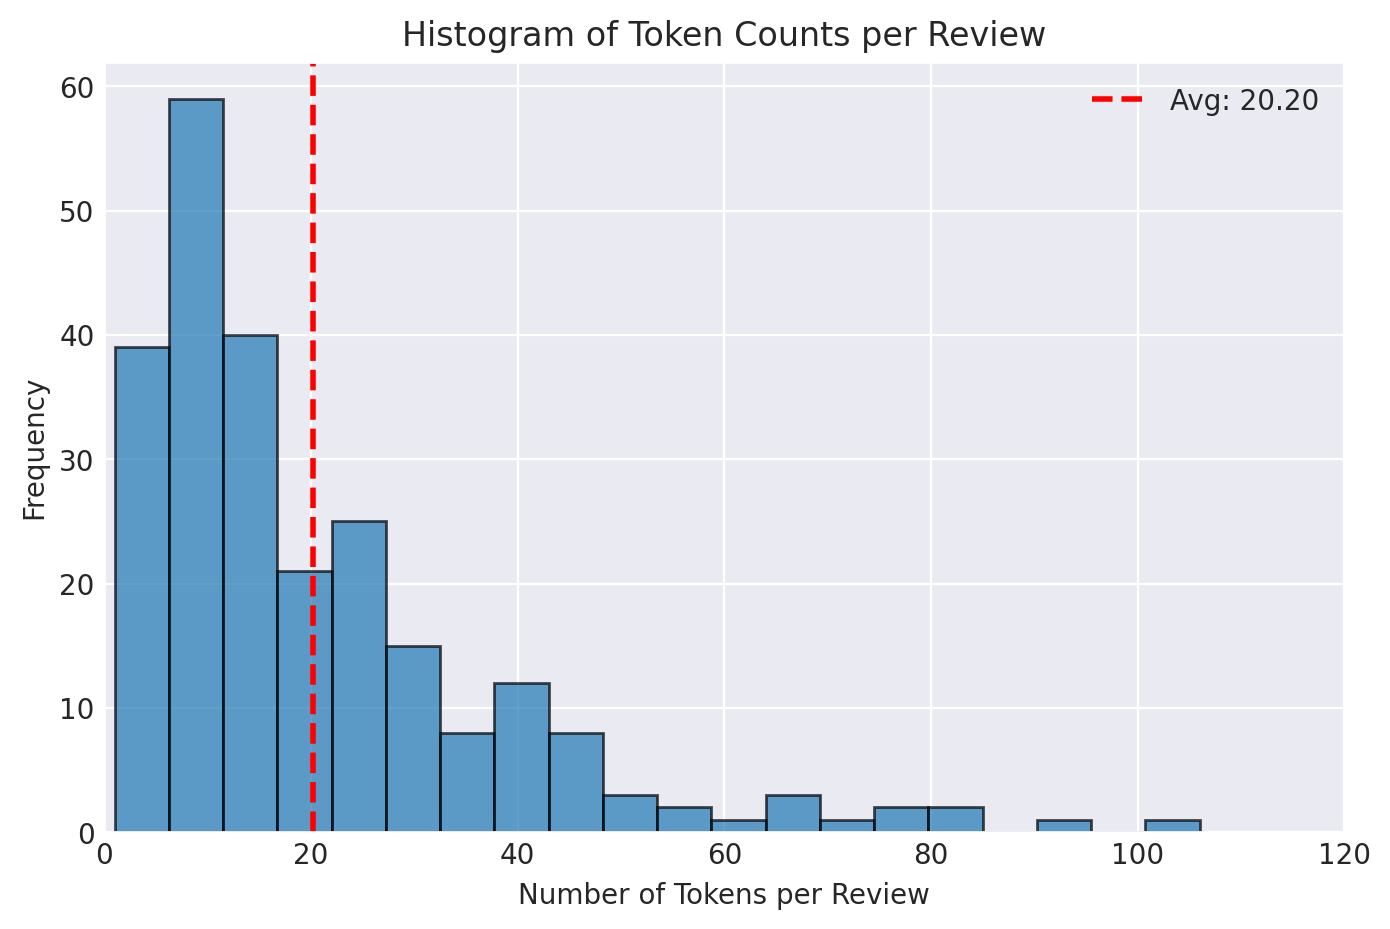

In [ ]:
# Get the number of tokens per document
token_counts = [len(doc) for doc in corpus]

# Compute the average number of tokens per review
avg_tokens = np.mean(token_counts)

# Define x-axis limits (Modify these values as needed)
x_min = 0
x_max = max(token_counts) + 10
x_max_man = 120

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(token_counts, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Number of Tokens per Review")
plt.ylabel("Frequency")
plt.title("Histogram of Token Counts per Review")
plt.axvline(avg_tokens, color='red', linestyle='dashed', linewidth=2, label=f'Avg: {avg_tokens:.2f}')
plt.legend()
# Set x-axis limits
plt.xlim(x_min, x_max_man)

# Print the average number of tokens
print(f"Average number of tokens per review: {avg_tokens:.2f}")

plt.show()

In [ ]:
# Check if it is useful to recover bigrams in this context
from gensim.models.phrases import Phrases

In [ ]:
bigram_model = Phrases(corpus, min_count=3, threshold=30)
corpus = [bigram_model[sentence] for sentence in corpus]

In [ ]:
bigram_list = list(bigram_model.export_phrases())
print(bigram_list)
# To judge with all dataset whether it is worth to keep the n-grams
# For now, incorporate them to corpus

['next_time', 'quite_bit', 'everyone_love', 'salt_pepper', 'family_love', 'olive_oil', 'white_wine', 'garlic_powder_onion_powder', 'pepper_onion', 'slice_mushroom', 'heavy_cream', 'salt_pepper_garlic_powder', 'white_wine_butter', 'half_half', 'garlic_powder', 'reserve_pasta', 'italian_restaurant']


In [ ]:
# And recompose the dictionary
# Create dictionary of tokens
D = Dictionary(corpus)
n_tokens = len(D)
print('Number of tokens in Dictionary: ',n_tokens)

# Limit the minimum number of documents in which a term has to appear to be included in Gensim dictionary
no_below = 2
# Limit the maximum proportion of documents in which a term may appear to be included in Gensim dictionary
no_above = .90

D.filter_extremes(no_below=no_below,no_above=no_above)
n_tokens = len(D)

print('Number of tokens in Dictionary after filtering extremes: ', n_tokens, 'terms')

# Extract the vocabulary
vocab = list(D.token2id.keys())
print(vocab[0:30])

Number of tokens in Dictionary:  1067
Number of tokens in Dictionary after filtering extremes:  506 terms
['add', 'blend', 'diced', 'excellent', 'flavor', 'fresh', 'like', 'marinate', 'since', 'spicy', 'chicken', 'every', 'good', 'know', 'mention', 'nearly', 'one', 'recipe', 'require', 'see', 'special', 'think', 'try', 'whole', 'would', 'actual', 'ahead_time', 'also', 'amount', 'change']


In [ ]:
# Store the elements in the resulting corpus in a file (to be able to recover it once the full corpus has been generated)
with open("reviews_corpus.txt", 'w', encoding='utf-8') as fout:
  for element in corpus:
    fout.write(' '.join(element) + '\n')

In [ ]:
# BoW
reviews_bow = [D.doc2bow(doc) for doc in corpus]

In [ ]:
# Check for one review the result
n_review = 100

print('============= Review =============')
print(reviews_df.loc[n_review, 'review'])

print('\n============= Review (lemmas) =============')
print(' '.join(corpus[n_review]))

print('\n============= Sparse vector representation =============')
print(reviews_bow[n_review])

print('\n============= Word counts for the review =============')
print(list(map(lambda x: (D[x[0]], x[1]), reviews_bow[n_review])))

============= Review =============
I read the reviews, and a bunch of them said this was kind of bland... so I seasoned the flour (italian seasoning, salt, garlic powder), added more chopped garlic plus salt and pepper to the veggies.  I also served the pasta (angel hair - all I had!) on the side with a drizzle of the sauce (left out most of the reserved pasta water).  Even with all of my changes, it was still a bit bland.  4* for my changes.

============= Review (lemmas) =============
read_review bunch say kind bland season flour italian_seasoning salt garlic_powder add chopped garlic plus salt_pepper veggie also serve pasta angel_hair side drizzle sauce leave reserve_pasta water even change still bit bland change

============= Sparse vector representation =============
[(0, 1), (27, 1), (29, 2), (46, 2), (49, 1), (52, 1), (56, 1), (57, 1), (68, 1), (78, 1), (89, 1), (106, 1), (127, 1), (157, 1), (159, 1), (215, 1), (216, 1), (232, 1), (236, 1), (254, 1), (265, 1), (276, 1), (283, 1

In [ ]:
# TF-IDF
from gensim.models import TfidfModel
# Train and transform
tfidf = TfidfModel(reviews_bow)
reviews_tfidf = tfidf[reviews_bow]

In [ ]:
print(reviews_tfidf[n_review])

[(0, 0.05912104448322797), (27, 0.10747624955200852), (29, 0.30623691729779257), (46, 0.27038936471499725), (49, 0.10297114427012316), (52, 0.11410552274221943), (56, 0.17420761826417547), (57, 0.15675092987473002), (68, 0.0516882255737038), (78, 0.27015726636892684), (89, 0.12162117282072288), (106, 0.16063410872739975), (127, 0.17420761826417547), (157, 0.16480518472524394), (159, 0.1693102900071293), (215, 0.21858497032985078), (216, 0.16480518472524394), (232, 0.19964704463407662), (236, 0.16063410872739975), (254, 0.247336161820483), (265, 0.1464891854586854), (276, 0.23114433046225), (283, 0.16480518472524394), (310, 0.23114433046225), (400, 0.23114433046225), (423, 0.23114433046225), (424, 0.27015726636892684)]


In [ ]:
# To upload dictionary from file, once we have the corpus calculated for the whole dataset
class IterableCorpus_fromfile:
    def __init__(self, filename):
        self.__filename = filename

    def __iter__(self):
        with open(self.__filename, 'r', encoding='utf-8') as fin:
            for line in fin:
                yield line.strip().split()

MyIterCorpus = IterableCorpus_fromfile('reviews_corpus.txt')
D = Dictionary()
for doc in MyIterCorpus:
    D.add_documents([doc])

# OBS: modify values according to what was used creating the Dictionary
no_below = 2
no_above = .90
D.filter_extremes(no_below=no_below,no_above=no_above)
n_tokens = len(D)

In [ ]:
# Check we recover the same tokens than before writting/reading the file
print(n_tokens)

506


In [ ]:
# Once the final dataset is created, use for efficiency and easy integration with LDA:
from gensim.corpora import MmCorpus

# Save
MmCorpus.serialize('reviews_corpus.mm', reviews_bow)

# Load
corpus = MmCorpus('reviews_corpus.mm')

In [ ]:
# WOR2VEC
from gensim.models import Word2Vec

# Create an iterator over the sentences in the file, named sentences
sentences = IterableCorpus_fromfile("reviews_corpus.txt")
# OBS: increase min_count once we have complete dataset
model_word2vec = Word2Vec(sentences=sentences, vector_size=300, window=5, sg=1, min_count=2, seed=42, workers=4)

In [ ]:
# Check results
print('============= Word2Vec vocabulary =============')
words = list(model_word2vec.wv.key_to_index)
print(len(words))
print(words[99:130])


============= Word2Vec vocabulary =============
516
['made', 'heavy_cream', 'triple', 'maybe', 'noodle', 'family', 'restaurant', 'half', 'pound', 'since', 'nothing', 'turn', 'basil', 'enough', 'either', 'parsley', 'everyone_love', 'hit', 'help', 'excellent', 'loved', 'breast', 'absolutely', 'family_love', 'cooking', 'top', 'read_review', 'seasoning', 'oregano', 'quite', 'get']


In [ ]:
# Code to save and load the model, if needed
# Store
model_word2vec.save("model_word2vec_recipe_reviews.model")

# Load
model_word2vec = Word2Vec.load("model_word2vec_recipe_reviews.model")

In [ ]:
from gensim.models import KeyedVectors

# In case we want to store just the words + their trained embeddings.
model_word2vec_wv= model_word2vec.wv
model_word2vec_wv.save("model_word2vec_recipe_reviews.wordvectors")

# Load back with memory-mapping = read-only, shared across processes.
WE_word2vec = KeyedVectors.load("model_word2vec_recipe_reviews.wordvectors", mmap='r')

In [ ]:
len(model_word2vec.wv)

516

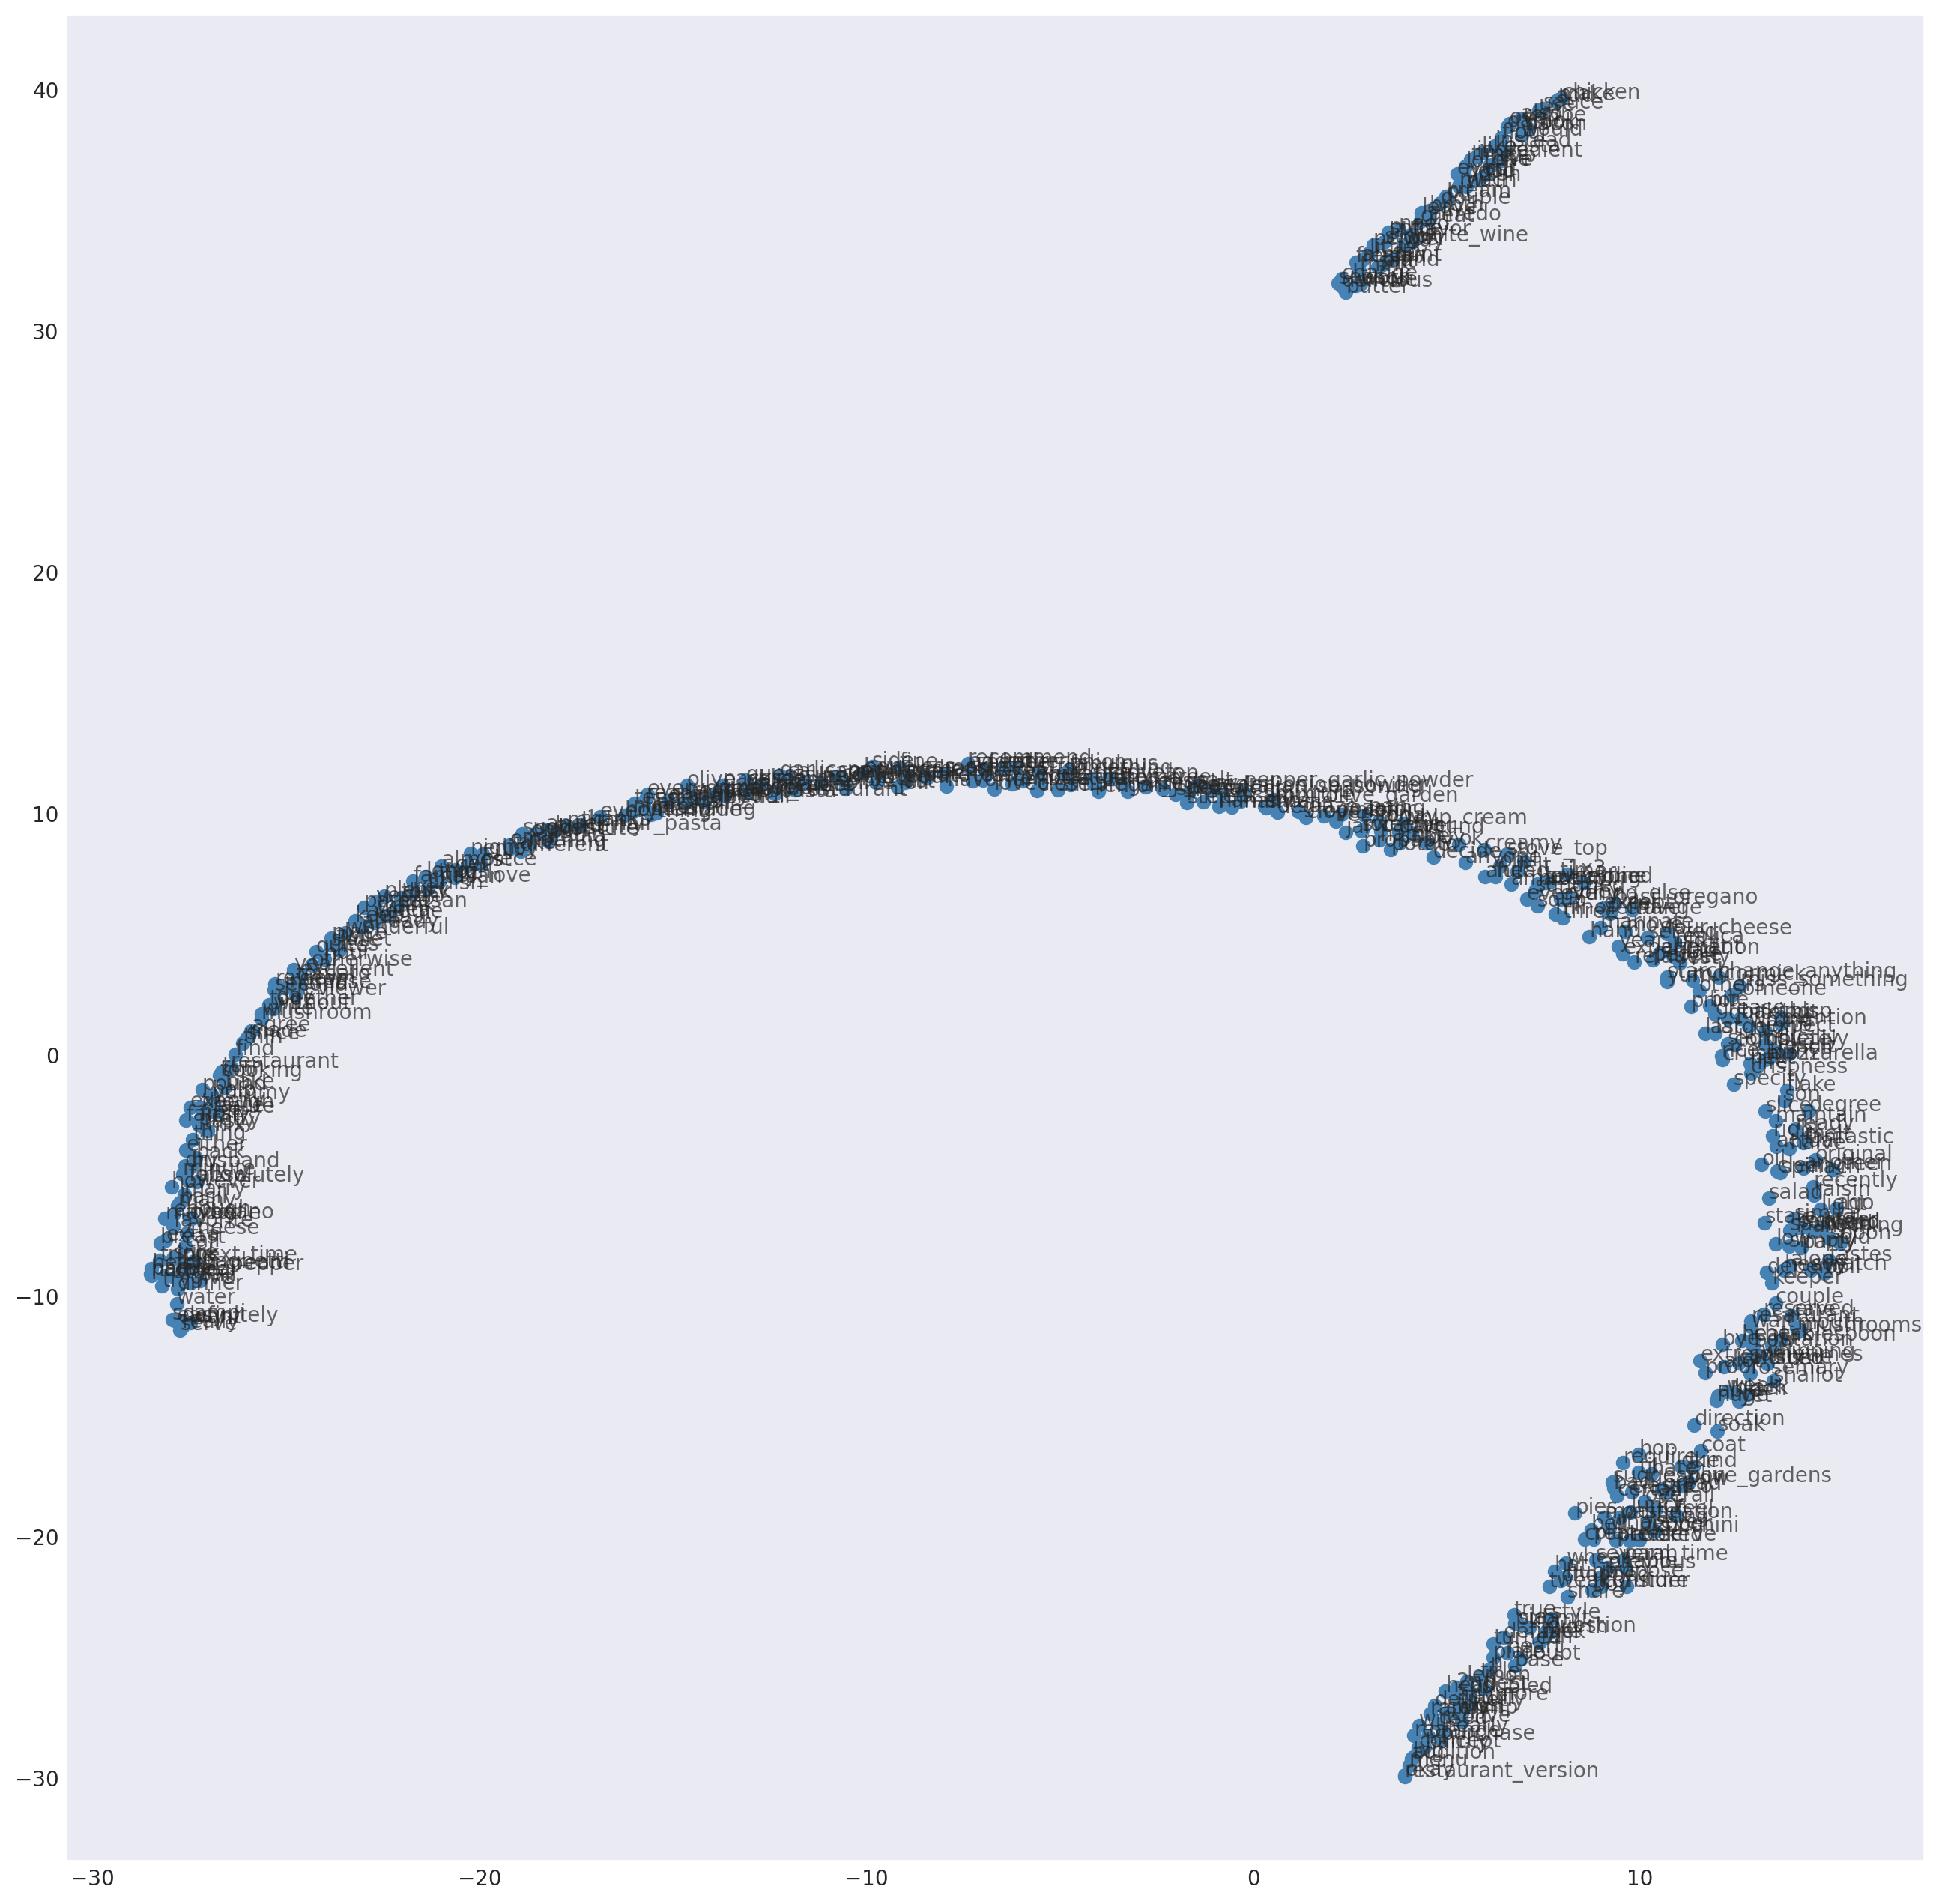

In [ ]:
# Code from Text Vectorization II (Lorena Calvo-Bartolomé)
from sklearn.manifold import TSNE

tsne = TSNE(init='random')
embed_tsne = tsne.fit_transform(model_word2vec.wv.vectors)

# We plot the embeddings
fig, ax = plt.subplots(figsize=(16, 16))
for idx, word in enumerate((list(model_word2vec.wv.key_to_index.keys())[:len(model_word2vec.wv)])):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(word, (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)

plt.grid()

In [ ]:
# Use the functions created in Text Vect Lab to see the performance of our models (for the time being)
def get_vocabulary_coverage(model, gensim_dict):
    """
    Computes the vocabulary coverage of a Word2Vec model on a given Gensim dictionary.

    Args:
        model (gensim.models.KeyedVectors): The pre-trained word vectors.
        gensim_dict (gensim.corpora.Dictionary): The Gensim dictionary containing IMDB words.

    Returns:
        float: The percentage of words in the dictionary that exist in the Word2Vec model.
    """
    vocab = gensim_dict.token2id.keys()
    total_words = len(vocab)

    # Avoid division by zero
    if total_words == 0:
        return 0.0
    # Count words in Word2Vec
    in_vocab_count = sum(1 for word in vocab if word in model)

    # Compute coverage percentage
    coverage = (in_vocab_count / total_words) * 100

    return coverage

In [ ]:
# Import csr_matrix to store the final matrix efficiently
from scipy.sparse import csr_matrix

def get_review_vector(model, review):
    """
    Computes the embedding vector for a given review by averaging word embeddings.

    Args:
        model (gensim.models.KeyedVectors): The pre-trained word vectors.
        review (list of str): A list of tokens representing the review.

    Returns:
        numpy.ndarray: The average embedding vector for the review.
    """
    # Get word vectors, ignore OOV words. For each word in the review (that is in the model, no OOV words)
    # recover its WE.
    vectors = [model[word] for word in review if word in model]
    # If all words are OOV, return a zero vector
    if not vectors:
        return np.zeros(model.vector_size)

    vec = np.mean(vectors, axis=0)  # Compute average vector

    return vec

In [ ]:
# Define a function to create the WE matrix
def create_review_matrix(model, corpus):
  # Corpus was our list of tokenized reviews
  n_reviews = len(corpus)
  # Get the dimension of word vectors
  embedding_size = model.vector_size

  # Create matrix to store review vectors
  review_matrix = np.zeros((n_reviews, embedding_size))

  # Compute review embeddings
  for i, review in enumerate(corpus):
      review_matrix[i] = get_review_vector(model, review)

  # Should be (n_reviews, embedding_size_word2vec)
  print(f"Embedding matrix shape: {review_matrix.shape}")
  return review_matrix

In [ ]:
# As our reviews are rated 1-5 stars, there is an implicit value in the order, perform regression.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def regression_svm(review_matrix_model, Y, test_size= 0.30, param_grid= {'C': np.arange(1, 11, 2), 'kernel': ['linear', 'rbf'], 'epsilon': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0]}):
    # Prepare the data
    # Use the review embeddings as features
    X = review_matrix_model
    y = Y

    # Split the dataset (70% training, 30% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Define SVR with GridSearchCV
    # param_grid = {'C': np.arange(1, 11, 2), 'kernel': ['linear', 'rbf'], 'epsilon': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0]}

    svr = SVR()
    grid = GridSearchCV(svr, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)

    # Evaluate the best model
    best_model = grid.best_estimator_
    test_R2 = best_model.score(X_test, y_test)
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Display results
    print(f"Best Hyperparameters: {grid.best_params_}")
    print(f"Test R2: {test_R2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

In [ ]:
#Calculate coverage by Word2Vec model
coverage = get_vocabulary_coverage(model_word2vec.wv, D)
print(f"Vocabulary Coverage: {coverage:.2f}%")

# Create the matrix of WE by Word2Vec model
review_matrix_word2vec = create_review_matrix(model_word2vec.wv, corpus)

# Regression with SVR
regression_svm(review_matrix_word2vec, Y)

Vocabulary Coverage: 100.00%
Embedding matrix shape: (243, 300)
Best Hyperparameters: {'C': 9, 'epsilon': 0.5, 'kernel': 'linear'}
Test R2: -0.0711
MSE: 1.2900
MAE: 0.8422


In [ ]:
# GLOVE
from gensim import downloader
glove = downloader.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
# Compare Glove model with our Word2Vec model
coverage = get_vocabulary_coverage(glove, D)
print("Coverage: ", coverage)

# Create the matrix of WE by Glove model
review_matrix_glove = create_review_matrix(glove, corpus)

# Regression
regression_svm(review_matrix_glove, Y)

Coverage:  90.9090909090909
Embedding matrix shape: (243, 50)
Best Hyperparameters: {'C': 7, 'epsilon': 0.2, 'kernel': 'rbf'}
Test R2: 0.0897
MSE: 1.0964
MAE: 0.7593


In [ ]:
# FASTTEXT
from gensim.models import FastText

In [ ]:
# Create the FastText model
# OBS: increase min_count once we have complete dataset
model_fasttext = FastText(sentences=sentences, vector_size=300, window=5, min_count=2,  sg=1, seed=42, workers=4, epochs=5)


In [ ]:
# Code to save and load the model, if needed
# Store
model_fasttext.save("model_fasttext_recipe_reviews.model")

# Load
model_fasttext = Word2Vec.load("model_fasttext_recipe_reviews.model")

In [ ]:
# In case we want to store only the WE
# Store just the words + their trained embeddings.
fasttext_wv = model_fasttext.wv
fasttext_wv.save("model_fastText.wordvectors")

# Load back with memory-mapping = read-only, shared across processes.
fastText_wv = KeyedVectors.load("model_fastText.wordvectors", mmap='r')

In [ ]:
len(model_fasttext.wv)

516

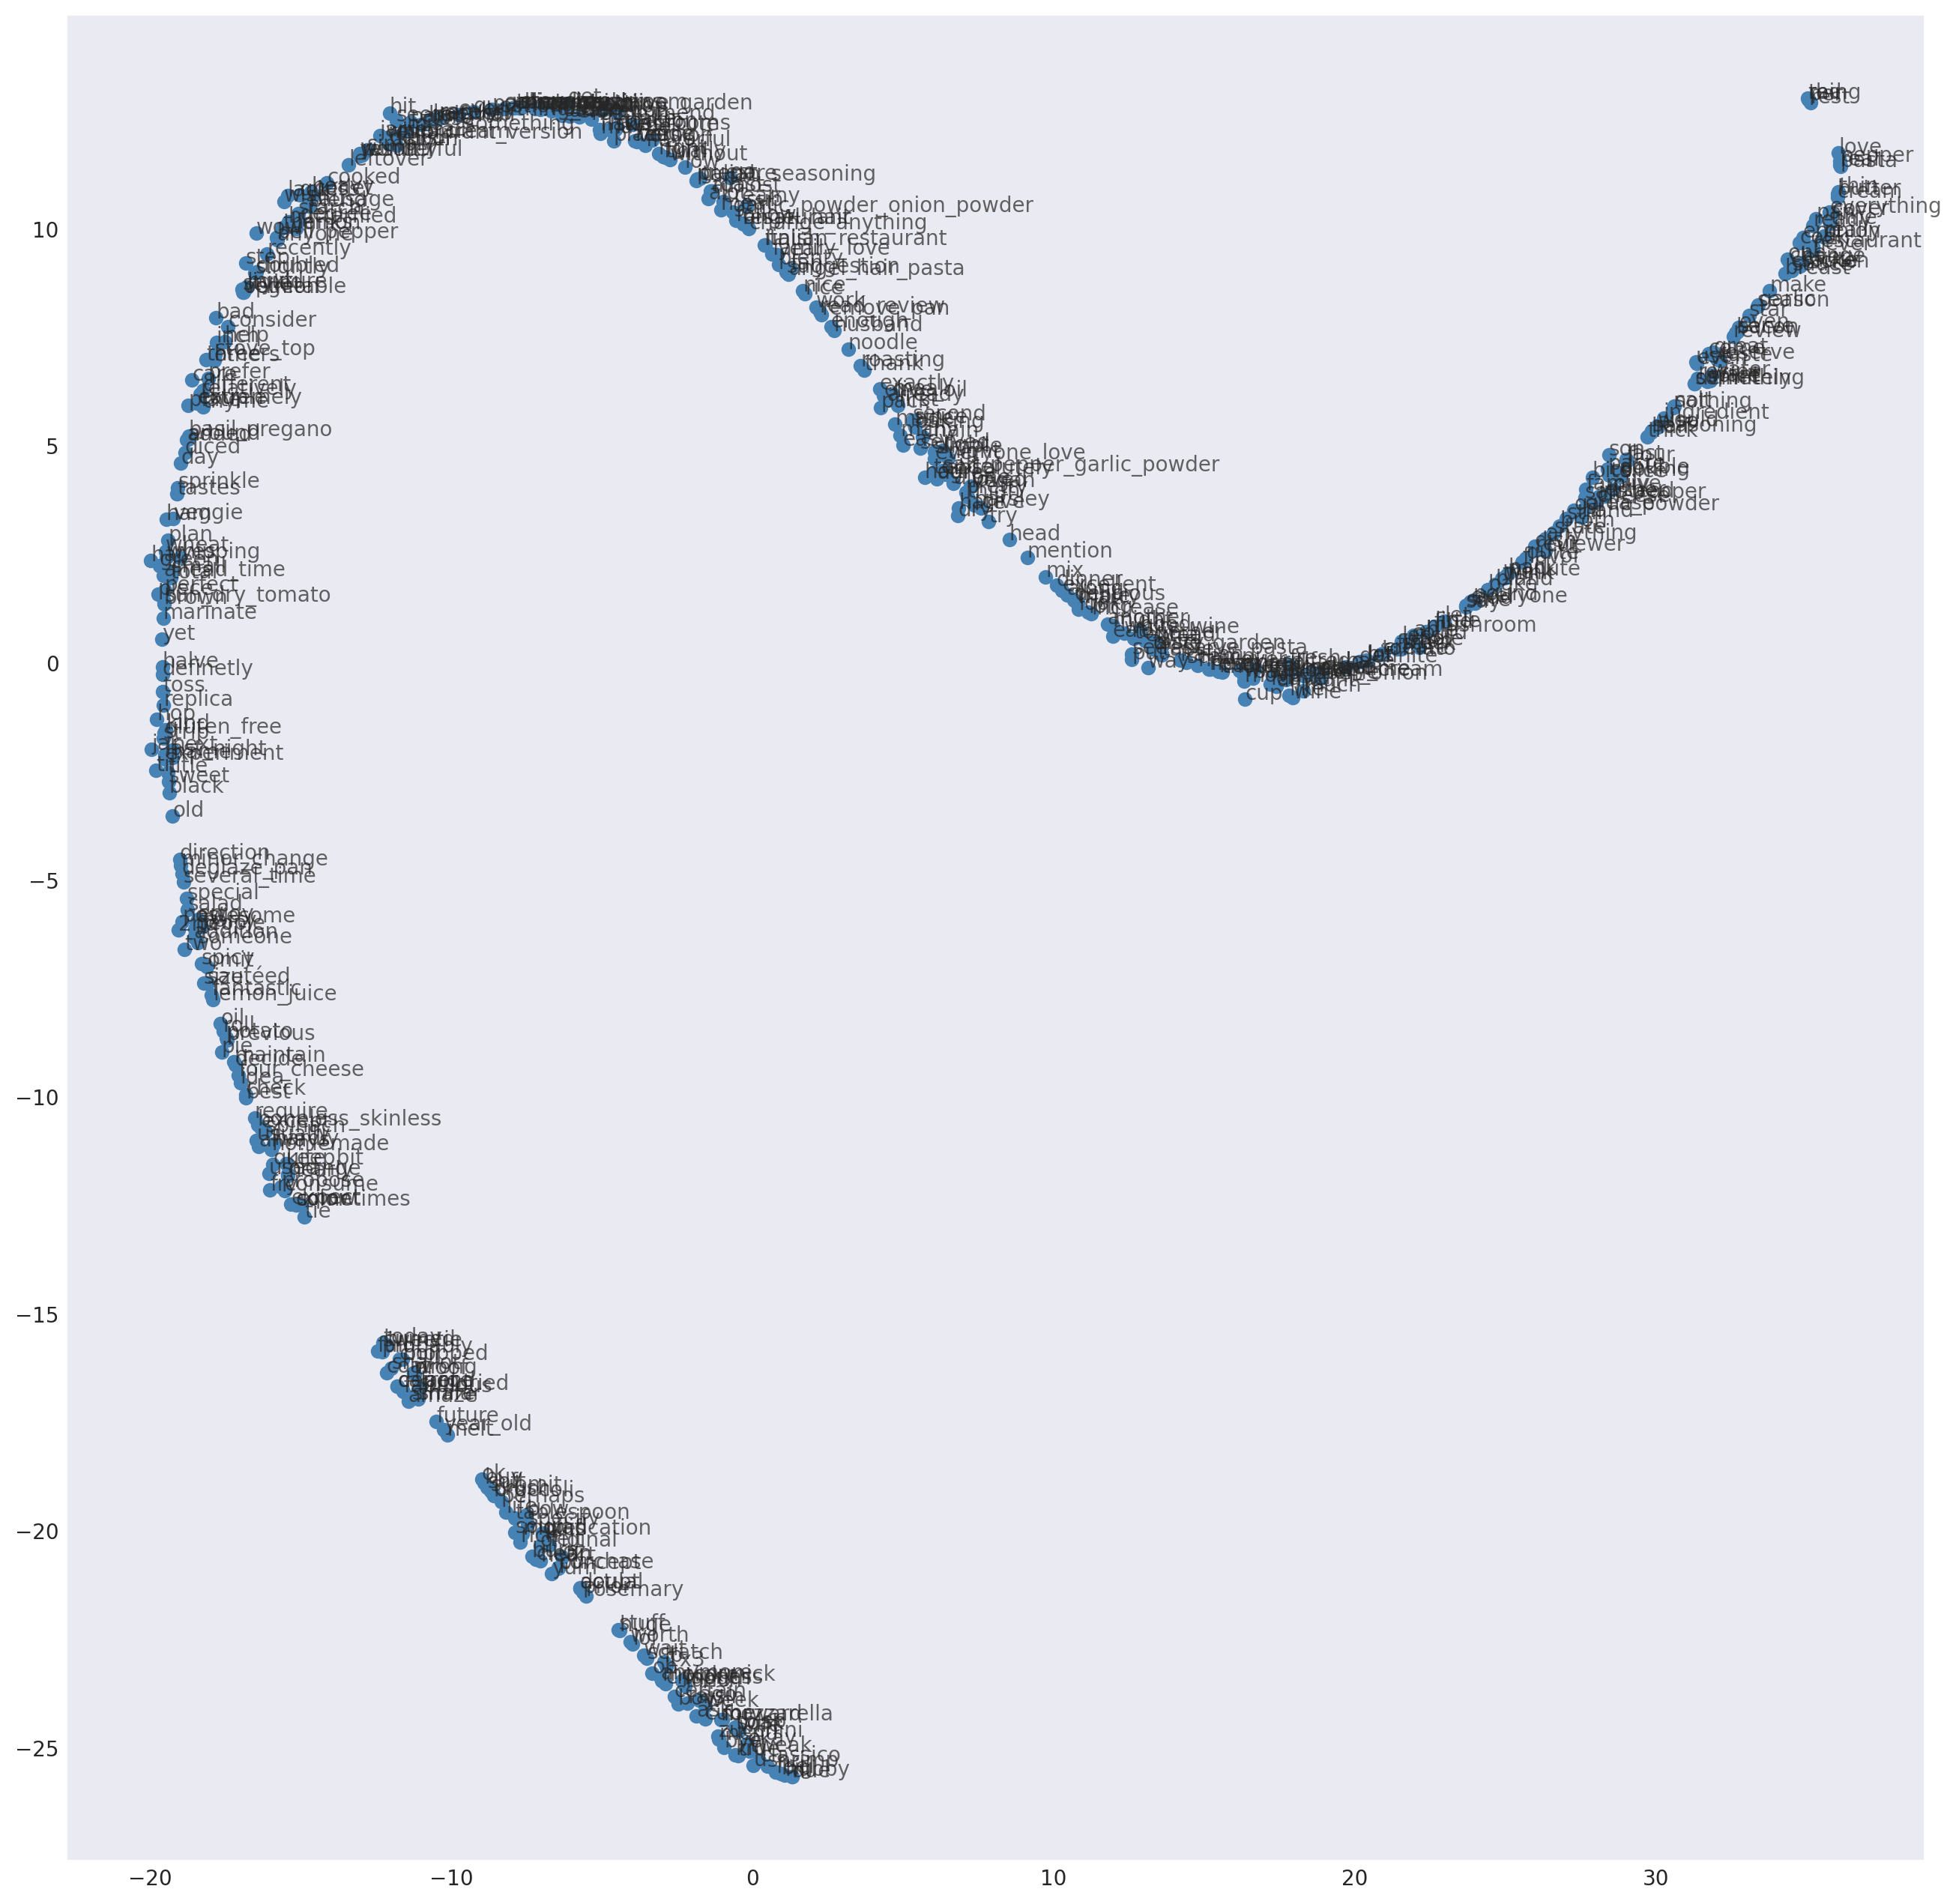

In [ ]:
tsne = TSNE(init='random')
embed_tsne = tsne.fit_transform(model_fasttext.wv.vectors)

# We plot the embeddings
fig, ax = plt.subplots(figsize=(16, 16))
for idx, word in enumerate((list(model_fasttext.wv.key_to_index.keys())[:len(model_fasttext.wv)])):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(word, (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)

plt.grid()

In [ ]:
# Compare FastText model with our Word2Vec model
coverage = get_vocabulary_coverage(model_fasttext.wv, D)
print("Coverage: ", coverage)

# Create the matrix of WE by FastText model
review_matrix_fasttext = create_review_matrix(model_fasttext.wv, corpus)

# Regression
regression_svm(review_matrix_fasttext, Y)

Coverage:  100.0
Embedding matrix shape: (243, 300)
Best Hyperparameters: {'C': 9, 'epsilon': 0.5, 'kernel': 'rbf'}
Test R2: -0.0719
MSE: 1.2909
MAE: 0.8424


In [ ]:
# FastText pretrained
try:
  import compress_fasttext
except ModuleNotFoundError:
  %pip install compress-fasttext
  import compress_fasttext

  Preparing metadata (setup.py) ... done
  Created wheel for compress-fasttext: filename=compress_fasttext-0.1.5-py3-none-any.whl size=16098 sha256=a706190cb2cbd3042943987a7e4e18f567c189e3f59e236f219c612ed9aa65e6
  Stored in directory: /root/.cache/pip/wheels/90/ed/77/0a7fc5e08ff30e062f09c6904844a5911a9e30a7e5ec376890
Successfully built compress-fasttext


In [ ]:
fastTextPre = compress_fasttext.models.CompressedFastTextKeyedVectors.load(
    'https://github.com/avidale/compress-fasttext/releases/download/v0.0.4/cc.en.300.compressed.bin'
)

In [ ]:
# Compare pretrained FastText model with our FastText model
coverage = get_vocabulary_coverage(fastTextPre, D)
print("Coverage: ", coverage)

# Create the matrix of WE by FastText model
review_matrix_fasttextPre = create_review_matrix(fastTextPre, corpus)

# Regression
regression_svm(review_matrix_fasttextPre, Y)

Coverage:  100.0


Embedding matrix shape: (243, 300)
Best Hyperparameters: {'C': 3, 'epsilon': 0.2, 'kernel': 'rbf'}
Test R2: 0.2382
MSE: 0.9174
MAE: 0.7309


In [ ]:
# LDA - TOPIC MODELING